In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import KFold
#from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# datafile has no duplicates (not a multilabelling problem)
datafile='/home/seherkhan/myfiles/coursework/usc/fall2018/MLforDI/project/FinalDraft/data/playlist_data_21oct_withoutdups.csv'
df=pd.read_csv(datafile,sep='|')
#print df
#print len(df)
tmp_X = df.iloc[:,4:18]
tmp_y = df.iloc[:,18:19]
tmp_y['playlist'] = tmp_y['playlist'].astype('category')
tmp_y['playlist_codes']=tmp_y['playlist'].cat.codes
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X=scaler.fit_transform(tmp_X)
y=np.ravel(tmp_y['playlist_codes'])

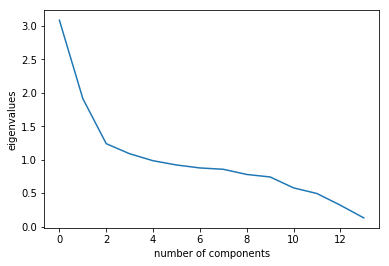

In [3]:
pca = PCA().fit(X)
plt.plot(pca.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('eigenvalues'); # dont think this is eigenvalue exactly
plt.show()

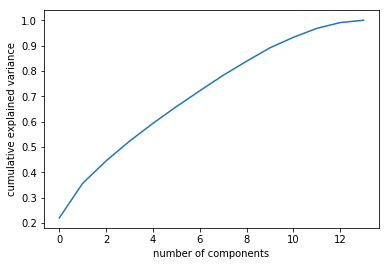

In [4]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [9]:
# criteria 1: number of components till where variance of each component is >=1
i=0
var=1
while(var>=1):
    var = pca.explained_variance_[i]
    i=i+1
compos_to_retain = i-1
print "Retain ",compos_to_retain," components."
X_transformed_cr1 = PCA(compos_to_retain).fit_transform(X)

Retain  4  components.


In [16]:
# criteria 2: number of components till where >=90% of variance is explained
i=0
cum_var=0
while(cum_var<=0.90):
    cum_var += pca.explained_variance_ratio_[i]
    i=i+1
compos_to_retain = i-1
print "Retain ",compos_to_retain," components."
X_transformed_cr2 = PCA(compos_to_retain).fit_transform(X)

Retain  10  components.


In [17]:
# criteria 3: retain number of components where cum_var flattens out (in this case all components)
print "Retain 14 components."
X_transformed_cr3 = PCA(compos_to_retain).fit_transform(X)

Retain 14 components.


In [24]:
from sklearn.naive_bayes import GaussianNB
print 'Gaussian Naive Bayes'
gnb = GaussianNB()

for Xkey,X in {"original X":X,
               "transformed X, criteria 1":X_transformed_cr1,
               "transformed X, criteria 2":X_transformed_cr2,
               "transformed X, criteria 3":X_transformed_cr3}.iteritems():
    print Xkey
    accuracy = 0
    prediction = 0 
    recall = 0
    f_score = 0
    for n in range(5):
        kf = KFold(n_splits=2,shuffle=True)

        for train_index,test_index in kf.split(X,y):
            X_1,X_2=X[train_index],X[test_index]
            y_1,y_2=y[train_index],y[test_index]

        X_train = X_1
        X_test = X_2
        y_train = y_1
        y_test = y_2

        gnb.fit(X_train, y_train)
        pred = gnb.predict(X_test)
        score = precision_recall_fscore_support(y_test, pred, labels=range(14), average='micro')
        accuracy = accuracy + accuracy_score(y_test, pred, normalize=True)
        prediction = prediction + score[0]
        recall = recall + score[1]
        f_score = f_score + score[2]

        X_train = X_2
        X_test = X_1
        y_train = y_2
        y_test = y_1

        gnb.fit(X_train, y_train)
        pred = gnb.predict(X_test)
        score = precision_recall_fscore_support(y_test, pred, labels=range(14), average='micro')
        accuracy = accuracy + accuracy_score(y_test, pred, normalize=True)
        prediction = prediction + score[0]
        recall = recall + score[1]
        f_score = f_score + score[2]

    # calculate average accuracy

    accuracy = accuracy/10
    prediction = prediction/10 
    recall = recall/10
    f_score = f_score/10

    print 'accuracy =', accuracy
    print 'prediction =', prediction
    print 'recall =', recall
    print 'f_score =', f_score

Gaussian Naive Bayes
transformed X, criteria 1
accuracy = 0.355011135857461
prediction = 0.355011135857461
recall = 0.355011135857461
f_score = 0.355011135857461
transformed X, criteria 3
accuracy = 0.3774610244988864
prediction = 0.3774610244988864
recall = 0.3774610244988864
f_score = 0.3774610244988864
transformed X, criteria 2
accuracy = 0.37714922048997773
prediction = 0.37714922048997773
recall = 0.37714922048997773
f_score = 0.37714922048997773
original X
accuracy = 0.37523385300668155
prediction = 0.37523385300668155
recall = 0.37523385300668155
f_score = 0.37523385300668155
